<a href="https://colab.research.google.com/github/nbilasals/segmentasi_jentik_nyamuk/blob/main/segmentsi_jentik_nyamuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Library
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Function Otsu

In [ ]:
def otsu_plot (path) :
  img = cv2.imread(path)
  image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  otsu_threshold, image_result = cv2.threshold(
      image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
  )
  print("Obtained threshold: ", otsu_threshold)
  cv2_imshow(img)
  cv2_imshow(image_result)

Obtained threshold:  153.0


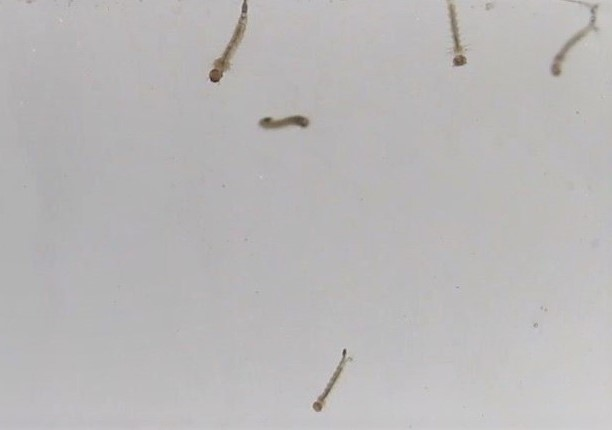

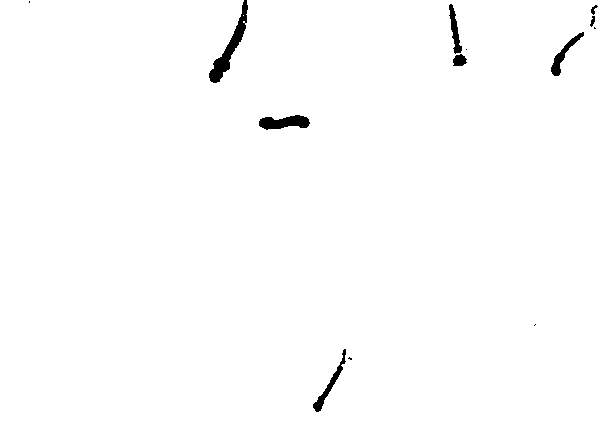

In [ ]:
otsu_plot('/content/drive/MyDrive/dataset/otsu/data/jentik1.jpg')

## Count Jentik Nyamuk 


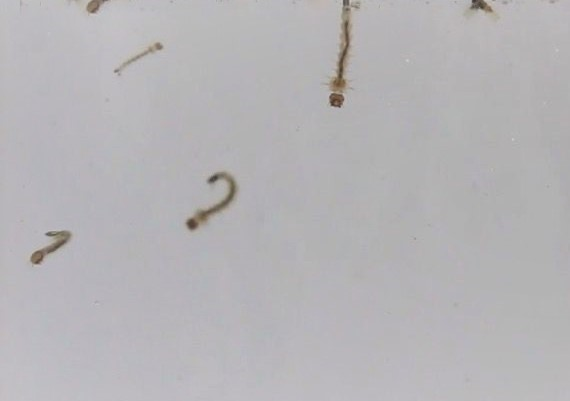

In [ ]:
# Baca Gambar
image = cv2.imread("/content/drive/MyDrive/dataset/otsu/data/jentik2.jpg")
cv2_imshow(image)

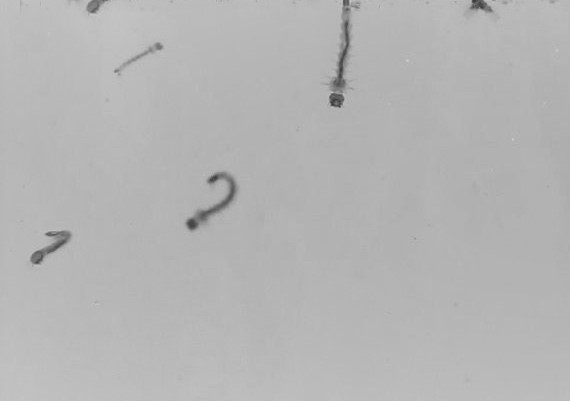

In [ ]:
# Ubah citra ke grascale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

In [ ]:
#Menyimpan Grayscale
savePath = "/content/drive/MyDrive/dataset/otsu/result/jentik2_gray.jpg"
cv2.imwrite(savePath, image_gray)

In [ ]:
# Menentukan Otsu Treshold
otsu_threshold, image_otsu = cv2.threshold(
    image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)
print("Obtained threshold: ", otsu_threshold)

Obtained threshold:  148.0


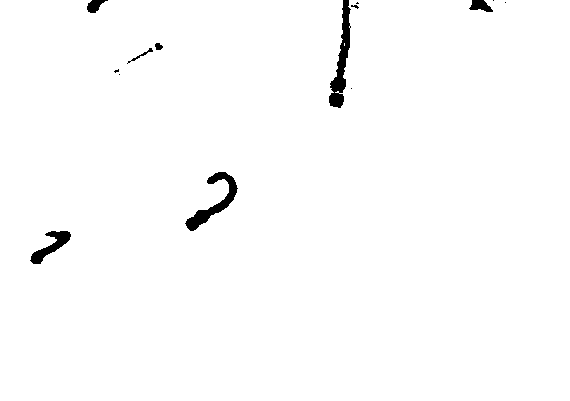

In [ ]:
# Plot Hasil Gambar Otsu
from google.colab.patches import cv2_imshow
cv2_imshow(image_otsu)

In [ ]:
#Menyimpan Otsu
savePath = "/content/drive/MyDrive/dataset/otsu/result/jentik2_otsu.jpg"
cv2.imwrite(savePath, image_otsu)

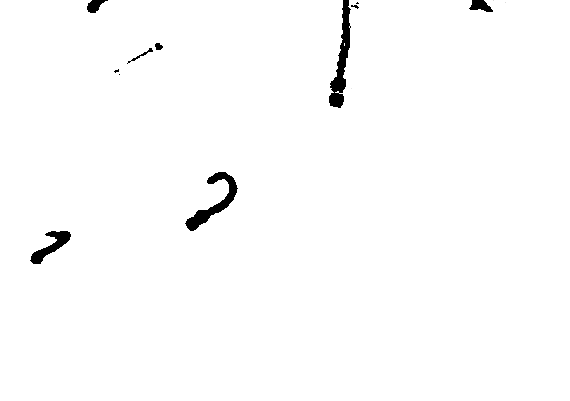

In [ ]:
#Denosing Otsu
image_otsu_clean = cv2.fastNlMeansDenoising(image_otsu, None, 20, 7, 21) 
cv2_imshow(image_otsu_clean)

In [ ]:
#Menyimpan Denoise
savePath = "/content/drive/MyDrive/dataset/otsu/result/jentik4_denoise.jpg"
cv2.imwrite(savePath, image_otsu_clean)

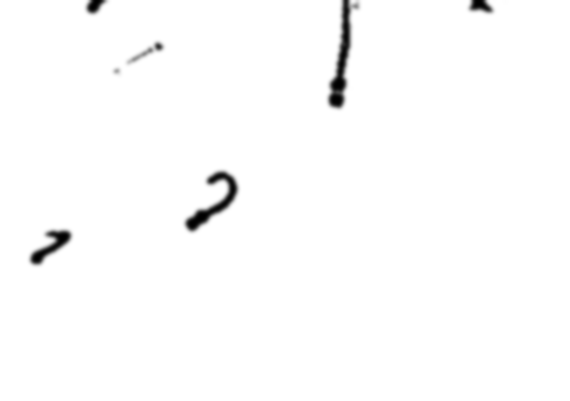

In [ ]:
#Gaussian Blur
blur = cv2.GaussianBlur(image_otsu_clean, (11, 11), 0)
cv2_imshow(blur)

In [ ]:
#Menyimpan GaussianBlur
savePath = "/content/drive/MyDrive/dataset/otsu/result/jentik4_gaussianblur.jpg"
cv2.imwrite(savePath, blur)

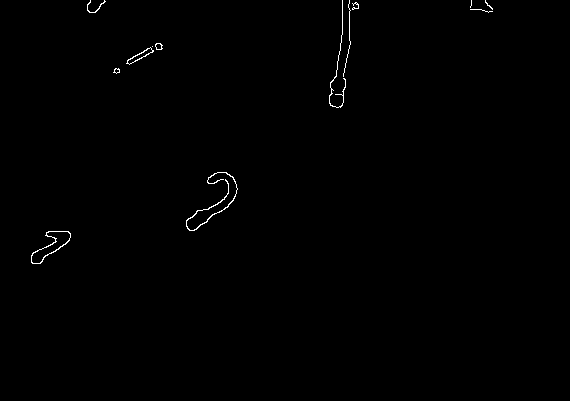

In [ ]:
#Deteksi Tepi - Canny
canny = cv2.Canny(blur, 30, 150, 3)
cv2_imshow(canny)

In [ ]:
#Menyimpan Canny
savePath = "/content/drive/MyDrive/dataset/otsu/result/jentik4_canny.jpg"
cv2.imwrite(savePath, canny)

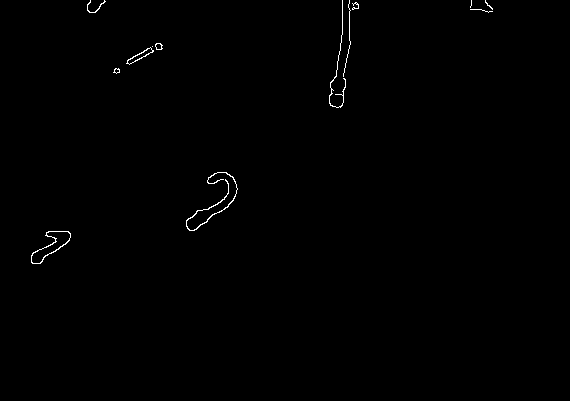

In [ ]:
#Dilasi
dilated = cv2.dilate(canny, (1, 1), iterations=0)
cv2_imshow(dilated)

In [ ]:
#Menyimpan Dilasi
savePath = "/content/drive/MyDrive/dataset/otsu/result/jentik4_dilasi.jpg"
cv2.imwrite(savePath, dilated)

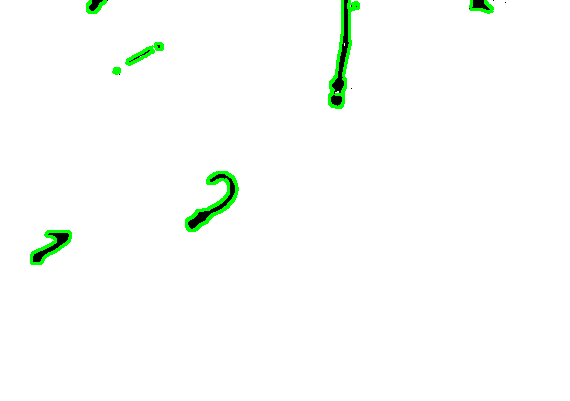

Jentik Pada Gambar :  13


In [ ]:
#Count Jentik
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image_otsu, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
cv2_imshow(rgb)
print("Jentik Pada Gambar : ", len(cnt))

In [ ]:
#Menyimpan Count
savePath = "/content/drive/MyDrive/dataset/otsu/result/jentik4_count.jpg"
cv2.imwrite(savePath, rgb)